In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('carprices.csv')
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car Model      13 non-null     object
 1   Mileage        13 non-null     int64 
 2   Sell Price($)  13 non-null     int64 
 3   Age(yrs)       13 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 548.0+ bytes


In [4]:
df.describe()

,Mileage,Sell Price($),Age(yrs)
count,13.000000,13.000000,13.000000
mean,60884.615385,26023.076923,5.307692
std,19185.665055,8003.661021,1.652504
min,22500.000000,12000.000000,2.000000
25%,52000.000000,20000.000000,5.000000
50%,59000.000000,26100.000000,5.000000
75%,72000.000000,32000.000000,6.000000
max,91000.000000,40000.000000,8.000000


In [5]:
df[['Mileage','Sell Price($)','Age(yrs)']].corr()

,Mileage,Sell Price($),Age(yrs)
Mileage,1.000000,-0.927116,0.993452
Sell Price($),-0.927116,1.000000,-0.921741
Age(yrs),0.993452,-0.921741,1.000000


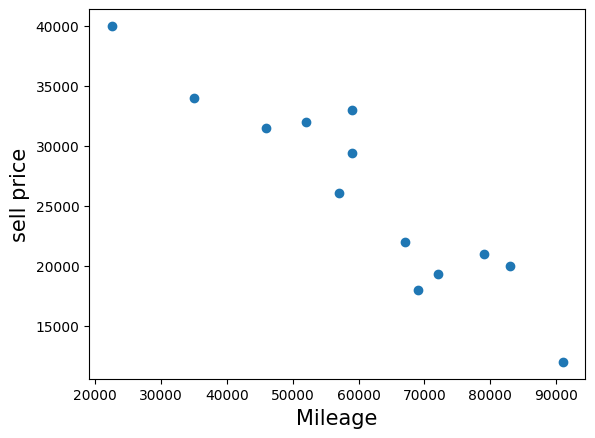

In [6]:
plt.xlabel('Mileage',fontsize=15)
plt.ylabel('sell price', fontsize=15)
plt.scatter(df['Mileage'],df['Sell Price($)'])

Based on the correlation table and the scatter plot above, we can see that the model should be a linear regresssion model

# Transforming the model for training the model

In [7]:
from sklearn.preprocessing  import LabelEncoder
label_encoder= LabelEncoder()

In [8]:
df['Car Model']=label_encoder.fit_transform(df['Car Model'])
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


# splitting the dataframe into  dependent (y) and independent (x) variables

In [9]:
x=df[['Car Model','Mileage', 'Age(yrs)']]
x

,Car Model,Mileage,Age(yrs)
0,1,69000,6
1,1,35000,3
2,1,57000,5
3,1,22500,2
4,1,46000,4
5,0,59000,5
6,0,52000,5
7,0,72000,6
8,0,91000,8
9,2,67000,6


In [10]:
y=df[['Sell Price($)']]
y

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500
5,29400
6,32000
7,19300
8,12000
9,22000


In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct= ColumnTransformer([('Car Model',OneHotEncoder(),[0])],remainder = 'passthrough')

In [12]:
x_transformed=ct.fit_transform(x)
x_transformed

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

taking away one column to prevent dummy variable trap

In [13]:
final_x = pd.DataFrame(x_transformed[:,1:])
final_x

,0,1,2,3
0,1.0,0.0,69000.0,6.0
1,1.0,0.0,35000.0,3.0
2,1.0,0.0,57000.0,5.0
3,1.0,0.0,22500.0,2.0
4,1.0,0.0,46000.0,4.0
5,0.0,0.0,59000.0,5.0
6,0.0,0.0,52000.0,5.0
7,0.0,0.0,72000.0,6.0
8,0.0,0.0,91000.0,8.0
9,0.0,1.0,67000.0,6.0


In [14]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(final_x,y)

LinearRegression()

In [15]:
model.predict(final_x)

array([[18705.2723644 ],
       [35286.78445645],
       [24479.19112468],
       [41245.76426391],
       [29882.98779056],
       [28023.6135243 ],
       [30614.46818502],
       [21879.57266964],
       [12182.34562104],
       [26183.72387885],
       [18929.31674102],
       [20409.80511857],
       [30477.15426157]])

In [16]:
model.score(final_x,y)

0.9417050937281083